In [63]:
#importanción de librerías a utilizar

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn as skl
from sklearn.preprocessing import MinMaxScaler
from colorama import init, Fore, Style

In [64]:
# IMPORTACIÓN DEL DATASET REDUCIDO

df = pd.read_csv('friesgo_2018_reduc.csv',  sep=',', encoding='utf-8')

df.head(5)

,id,region,tamanio_aglomerado,localidades_150,tipo_vivienda,obtiene_gas,obtiene_agua,baño,cant_componentes,tipo_hogar,...,colesterol_alto,prevalencia_colesterol,consumido_alcohol,consumo_regular_riesgo,dijeron_diabetes,fue_embarazo,familiares_directos_diabetes,familiares_no_directos_diabetes,medicion_azucar,control_diabetes
0,1128639,1,1,1,3,1,1,1,2,2,...,2,2.0,1,2.0,2,NaN,2,2,2,1
1,1709939,1,1,1,1,1,1,1,3,4,...,1,1.0,1,2.0,2,NaN,2,2,1,1
2,6874130,1,1,1,3,1,1,1,2,2,...,2,2.0,1,2.0,2,NaN,2,2,2,1
3,10319375,1,1,1,3,4,1,1,1,1,...,1,1.0,1,2.0,2,NaN,2,1,2,1
4,11140857,1,1,1,3,1,1,1,2,8,...,2,2.0,1,2.0,2,NaN,2,99,1,1


# ANÁLISIS PREVIOS

Como se detalla en el README, el objetivo del siguiente análisis es determinar las disparidades regionales dentro de Argentina en la ocurrencia de enfermedades no transmisibles (en particular aquellas relacionadas con el estilo de vida: diabetes, hipertensión y colesterol), para mayor sencillez las denominaremos ENT (enfermedades No transmisibles). Se analizarán disparidades regionales y a partir de esto, las causas de las mismas.   

Realizaremos una división general para determinar las variables que se considerarán "posibles causas" y las variables que consideramos "consecuencias". Las consecuencias hace referencia a la aparición de enfermedades

### Variables consideradas CAUSAS

1. caracteristicas_vivienda
2. caracteristicas_hogar
3. ingresos_hogar
4. caracteristicas_encuestado
5. salud_y_af
6. tabaquismo
7. pesocorporal
8. alimentacion
9. consumo_alcohol

### Variables consideradas CONSECUENCIAS

1. hipertension
2. colesterlo
3. diabetes

### Variables ordenadora

El dominio_geografico, y en particular la columna "region" determinarán la división


# ANÁLISIS DE OCURRENCIA DE LAS ENT POR REGIÓN



## COLESTEROL EN FUNCIÓN DE REGIÓN

In [65]:
#Realizaremos un BOXPLOT para este análisis

#usaremos la variable "region" y la variable "colesterol_alto". Calcularemos porcentaje de colesterol alto en cada region. El porcentaje se calcula como cantidad de '1' respecto al total de '2'

#agrupamos para poder calcular porcentajes de cada situación (NO solo conteo)



###########################################################3

colesterol_si = df[df['colesterol_alto']==1]   #filtro solo valores 1 que corresponde a colesterol alto
colesterol_no = df[df['colesterol_alto']==2]    #filtro solo valores 2 que corresponde a colesterol normal

suma_colesterol_si = colesterol_si.groupby('region')['colesterol_alto'].sum()     #sumo total

suma_colesterol_no = colesterol_no.groupby('region')['colesterol_alto'].sum()     #sumo total

print(suma_colesterol_si)
print(suma_colesterol_no)

region
1     894
2    2033
3    1174
4     785
5     622
6     875
Name: colesterol_alto, dtype: int64
region
1     5252
2    14340
3     8410
4     6816
5     3848
6     6178
Name: colesterol_alto, dtype: int64


In [66]:
#dado que las sumas totales por región son dispares calcularemos el porcentaje de personas concolesterol alto para poder comparar


colesterol_si_prom = (suma_colesterol_si * 100)/(suma_colesterol_si + suma_colesterol_no)  #calculo porcentaje de alto sobre el total 

colesterol_si_prom = colesterol_si_prom.round(2)   #limito a 2 decimales la salida

print(colesterol_si_prom)



region
1    14.55
2    12.42
3    12.25
4    10.33
5    13.91
6    12.41
Name: colesterol_alto, dtype: float64


In [67]:
dfc = colesterol_si_prom.reset_index()

dfc.columns = ['region', 'Porcentaje_colesterol_alto']

print(dfc)

   region  Porcentaje_colesterol_alto
0       1                       14.55
1       2                       12.42
2       3                       12.25
3       4                       10.33
4       5                       13.91
5       6                       12.41


## HIPERTENSIÓN EN FUNCIÓN DE REGIÓN

In [68]:

hipertension_si = df[(df['veces_presion_alta'] == 1)]  #filtro solo valores 1 y 2 que corresponde a hipertesnion 1 vez y 2 es hipertension + de 1 vez

hipertension_si_2 = df[df['veces_presion_alta']==2]   #filtro solo valores 2 que corresponde a hipertension + de 1 vez

hipertension_no = df[df['veces_presion_alta']==3]    #filtro solo valores 3 que corresponde no presion alta

suma_hipertension_si = hipertension_si.groupby('region')['veces_presion_alta'].sum()     #sumo total

suma_hipertension_si_2 = hipertension_si_2.groupby('region')['veces_presion_alta'].sum()     #sumo total

suma_hipertension_no = hipertension_no.groupby('region')['veces_presion_alta'].sum()     #sumo total

print(suma_hipertension_si)
print(suma_hipertension_si_2)
print(suma_hipertension_no)

region
1     412
2    1147
3     619
4     626
5     323
6     551
Name: veces_presion_alta, dtype: int64
region
1    1568
2    4650
3    2202
4    2106
5    1312
6    1672
Name: veces_presion_alta, dtype: int64
region
1     7026
2    17457
3    11112
4     7575
5     4734
6     7833
Name: veces_presion_alta, dtype: int64


In [69]:
#promedios

hipertension_si_prom = ((suma_hipertension_si + suma_hipertension_si_2) * 100)/(suma_hipertension_si + suma_hipertension_si_2 + suma_hipertension_no)  #calculo porcentaje de alto sobre el total 

hipertension_si_prom = hipertension_si_prom.round(2)   #limito a 2 decimales la salida

print(hipertension_si_prom)

region
1    21.99
2    24.93
3    20.25
4    26.51
5    25.67
6    22.11
Name: veces_presion_alta, dtype: float64


In [70]:
dfh = hipertension_si_prom.reset_index()

dfh.columns = ['region', 'Porcentaje_hipertension']

print(dfh)

   region  Porcentaje_hipertension
0       1                    21.99
1       2                    24.93
2       3                    20.25
3       4                    26.51
4       5                    25.67
5       6                    22.11


## DIABETES EN FUNCIÓN DE REGIÓN

In [71]:

diabetes_si = df[df['dijeron_diabetes']==1]   #filtro solo valores 1 que corresponde a diabetes
diabetes_no = df[df['dijeron_diabetes']==2]    #filtro solo valores 2 que corresponde a no diabetes

suma_diabetes_si = diabetes_si.groupby('region')['dijeron_diabetes'].sum()     #sumo total

suma_diabetes_no = diabetes_no.groupby('region')['dijeron_diabetes'].sum()     #sumo total

print(suma_diabetes_si)
print(suma_diabetes_no)

region
1     441
2    1309
3     689
4     515
5     382
6     588
Name: dijeron_diabetes, dtype: int64
region
1     6224
2    16014
3     9500
4     7414
5     4374
6     6804
Name: dijeron_diabetes, dtype: int64


In [72]:
#promedios


diabetes_si_prom = (suma_diabetes_si * 100)/(suma_diabetes_si + suma_diabetes_no)  #calculo porcentaje de alto sobre el total 

diabetes_si_prom = diabetes_si_prom.round(2)   #limito a 2 decimales la salida

print(diabetes_si_prom)


region
1    6.62
2    7.56
3    6.76
4    6.50
5    8.03
6    7.95
Name: dijeron_diabetes, dtype: float64


In [73]:
dfd = diabetes_si_prom.reset_index()

dfd.columns = ['region', 'Porcentaje_diabetes']

print(dfd)

   region  Porcentaje_diabetes
0       1                 6.62
1       2                 7.56
2       3                 6.76
3       4                 6.50
4       5                 8.03
5       6                 7.95


## UNIMOS COLUMNAS

In [74]:
df2 = dfc.merge(dfh, on= 'region', how='outer' ).merge(dfd, on= 'region', how='outer')  
df2

,region,Porcentaje_colesterol_alto,Porcentaje_hipertension,Porcentaje_diabetes
0,1,14.55,21.99,6.62
1,2,12.42,24.93,7.56
2,3,12.25,20.25,6.76
3,4,10.33,26.51,6.50
4,5,13.91,25.67,8.03
5,6,12.41,22.11,7.95


In [75]:
#nombramos la regiones 

region_dict = {
    1: 'Metropolitana',
    2: 'Pampeana',
    3: 'Noroeste',
    4: 'Noreste',
    5: 'Cuyo',
    6: 'Patagónica'
}
df2['region'] = df2['region'].map(region_dict)

print(df2)

          region  Porcentaje_colesterol_alto  Porcentaje_hipertension  \
0  Metropolitana                       14.55                    21.99   
1       Pampeana                       12.42                    24.93   
2       Noroeste                       12.25                    20.25   
3        Noreste                       10.33                    26.51   
4           Cuyo                       13.91                    25.67   
5     Patagónica                       12.41                    22.11   

   Porcentaje_diabetes  
0                 6.62  
1                 7.56  
2                 6.76  
3                 6.50  
4                 8.03  
5                 7.95  



###  <u> PORCENTAJE DE PERSONAS CON COLESTEROL ALTO, HIPERTENSIÓN Y DIABETES POR REGIÓN </u> 
 


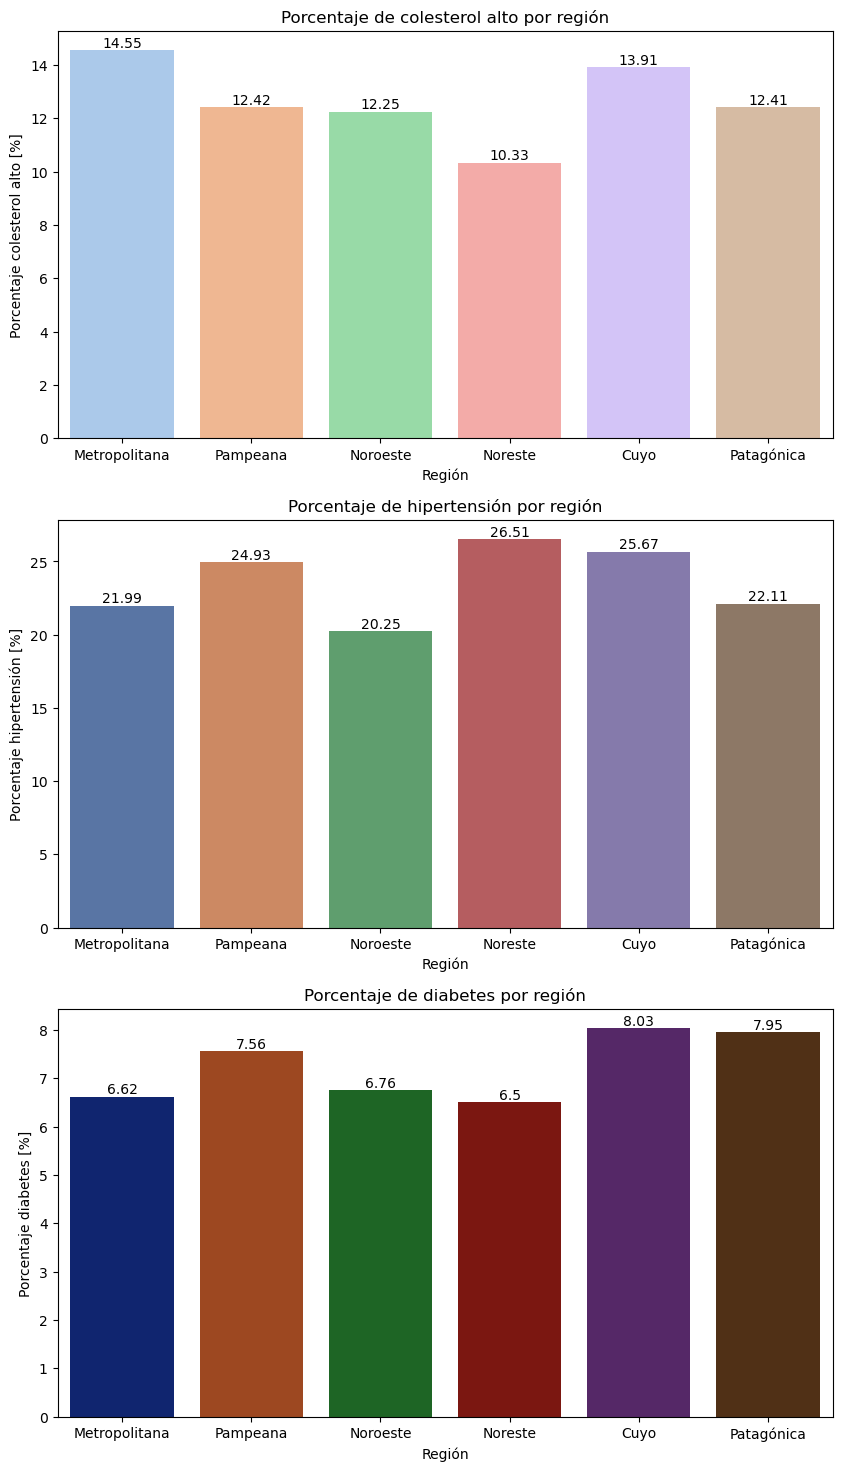

In [87]:

plt.figure(figsize=(10, 18))

# Gráfico 1: Comparación de colesterol alto por región
plt.subplot(3, 1, 1)
sns.barplot(data=df2, x='region', y='Porcentaje_colesterol_alto', palette='pastel')
plt.title('Porcentaje de colesterol alto por región')
plt.xlabel('Región')
plt.ylabel('Porcentaje colesterol alto [%]')


ax = plt.gca()
for bar in ax.patches:
    yval = bar.get_height()  # Altura de la barra
    xval = bar.get_x() + bar.get_width() / 2  # Posición central de la barra en el eje X
    ax.text(xval, yval, round(yval, 2), va='bottom', ha='center', fontsize=10)  # Mostrar el valor encima de la barra


# Gráfico 2: Comparación de hipertensión por región
plt.subplot(3, 1, 2)
sns.barplot(data=df2, x='region', y='Porcentaje_hipertension', palette='deep')
plt.title('Porcentaje de hipertensión por región')
plt.xlabel('Región')
plt.ylabel('Porcentaje hipertensión [%]')


ax = plt.gca()
for bar in ax.patches:
    yval = bar.get_height()  # Altura de la barra
    xval = bar.get_x() + bar.get_width() / 2  # Posición central de la barra en el eje X
    ax.text(xval, yval, round(yval, 2), va='bottom', ha='center', fontsize=10)  # Mostrar el valor encima de la barra


# Gráfico 3: Comparación de diabetes por región
plt.subplot(3, 1, 3)
sns.barplot(data=df2, x='region', y='Porcentaje_diabetes', palette='dark')
plt.title('Porcentaje de diabetes por región')
plt.xlabel('Región')
plt.ylabel('Porcentaje diabetes [%]')


ax = plt.gca()
for bar in ax.patches:
    yval = bar.get_height()  # Altura de la barra
    xval = bar.get_x() + bar.get_width() / 2  # Posición central de la barra en el eje X
    ax.text(xval, yval, round(yval, 2), va='bottom', ha='center', fontsize=10)  # Mostrar el valor encima de la barra


#plt.tight_layout()  # Ajustar espaciado entre los subplots
plt.show()

## Conclusión de los gráficos


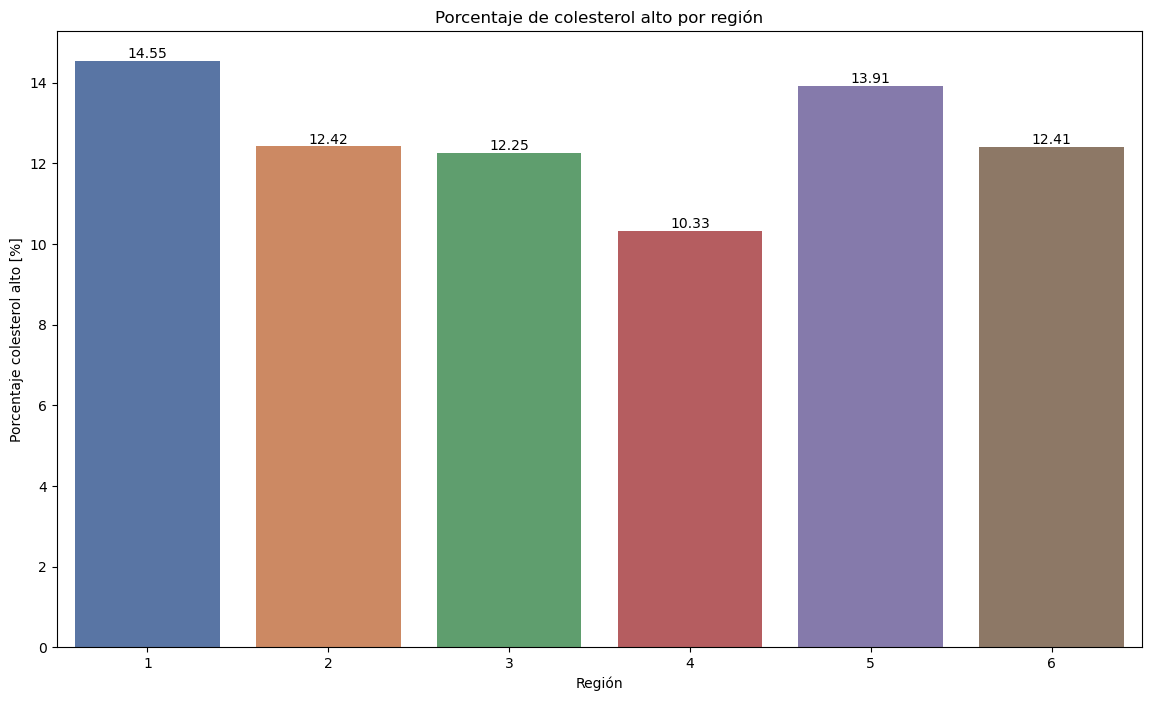

In [76]:
plt.figure(figsize=(14, 8))
sns.barplot(data=dfc,  x='region', y='Porcentaje_colesterol_alto',  palette='deep')

plt.title('Porcentaje de colesterol alto por región')
plt.xlabel('Región')
plt.ylabel('Porcentaje colesterol alto [%]')
#plt.legend(title='Hipertensión', loc='upper right')

# Mostrar los valores de las barras
ax = plt.gca()
for bar in ax.patches:
    yval = bar.get_height()  # Altura de la barra
    xval = bar.get_x() + bar.get_width() / 2  # Posición central de la barra en el eje X
    ax.text(xval, yval, round(yval, 2), va='bottom', ha='center', fontsize=10)  # Mostrar el valor encima de la barra

    
plt.show()